In [2]:
NAME = "Niloy Farhan"
ID = "20101118"
COLLABORATORS_ID = ["21241056", ""]

# WALKTHROUGH
Watch [this](https://youtu.be/96Ssek9nLRs) how-to tutorial first

In [3]:
# ---------------------------------------------------------------------
# ---------------------------------------------------------------------
# !!!!!!!!!!!!!!!!! WATCH THE WALKTHROUGH VIDEO FIRST !!!!!!!!!!!!!!!!!
# ---------------------------------------------------------------------
# ---------------------------------------------------------------------

# Necessary library import

In [4]:
import numpy as np 
from skimage import io, color, exposure
import matplotlib.pyplot as plt 

# Task 1 - Basic Image Operation

import your image or any photo taken by you (`sample.jpeg`) as a numpy array, save it in the varaible `I`

remember your image name MUST be `sample.jpeg`. 

Make sure the height and the width of the image is **smaller than 1000 pixels**.

In [5]:
I = None # Replace None with appropriate function call line


# find the height and the width of the image
H = None # should contain height
W = None # should contain width


### BEGIN SOLUTION
I = io.imread("sample.jpg")
H = I.shape[0]
W = I.shape[1]
print("Height is", H)
print("Width is", W)
### END SOLUTION

Height is 867
Width is 719


(-0.5, 718.5, 866.5, -0.5)

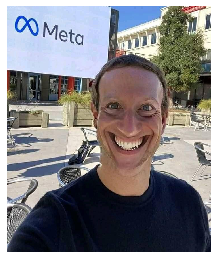

In [6]:
# Normalize the image so that the gray scales are between 0 and 1. Save it to I and display the image


### BEGIN SOLUTION
I = I/255
io.imshow(I)
plt.axis("off")
### END SOLUTION

(-0.5, 718.5, 866.5, -0.5)

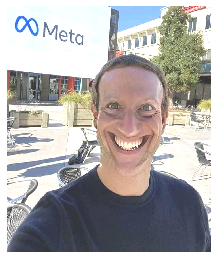

In [7]:
# Increase the brightness of the image without changing the contrast. 
# Save the resulting image in I_bright and display it.
I_bright = None 

### BEGIN SOLUTION
I_bright = np.clip(I+0.2,0,1)
io.imshow(I_bright)
plt.axis("off")
### END SOLUTION

(-0.5, 718.5, 866.5, -0.5)

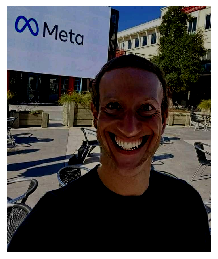

In [8]:
# Decrease the brightness of the image without changing the contrast. 
# Save the resulting image in I_dark and display it.
I_dark = None 

### BEGIN SOLUTION
I_dark = np.clip(I-0.3,0,1)
io.imshow(I_dark)
plt.axis("off")
### END SOLUTION

(-0.5, 718.5, 866.5, -0.5)

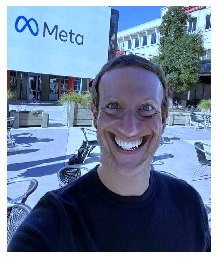

In [9]:
# Multiply the three channels of image I with three DIFFERENT numbers between 0.3 and 3 
# Save the resulting image in I_tint and display it.
# The resulting image should have some color shift
I_tint = None

# HINT: 
# I_tint = np.zeros(I.shape)
# I_tint[:, :, 0] =  ..... I[:, :, 0].....
# ......

### BEGIN SOLUTION
I_tint = np.zeros(I.shape)
tint = [ 0.8 , 1 , 1.4 ]
for i in range(3):
    I_tint[:, :, i] = np.clip(I[:,:,i] * tint[i],0,1)
    
io.imshow(I_tint)
plt.axis("off")
### END SOLUTION

(-0.5, 718.5, 866.5, -0.5)

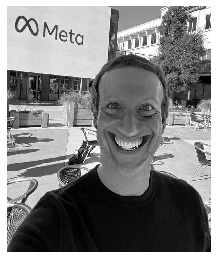

In [10]:
# Convert the image into a grayscale image.
# Save it to I_gray and display it
I_gray = None

### BEGIN SOLUTION
I_gray = color.rgb2gray(I)
io.imshow(I_gray)
plt.axis("off")
### END SOLUTION

(-0.5, 718.5, 866.5, -0.5)

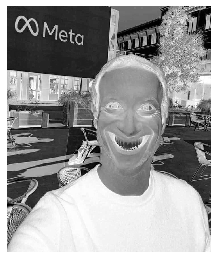

In [11]:
# Display the negative of the grayscale image

### BEGIN SOLUTION
I_gray_neg = 1 - I_gray
io.imshow(I_gray_neg)
plt.axis("off")
### END SOLUTION

(-0.5, 718.5, 866.5, -0.5)

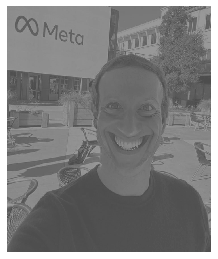

In [12]:
# Artificially degrade the **grayscale image** by reducing it contrast
# You can do so by recaling the gray values and concentrating them in a narrow range,
# say between 0.3 and 0.6.
# Save the image as I_degraded and display it
# HINT: SEE lec-4-demo-codes

I_degraded = None

### BEGIN SOLUTION

I_degraded = exposure.rescale_intensity(I_gray,in_range = (0,1), out_range = (0.3,0.6))
io.imshow(I_degraded)
plt.axis("off")
### END SOLUTION

In [13]:
a = np.arange(10)
np.where(a < 5, 0, 10*a)

array([ 0,  0,  0,  0,  0, 50, 60, 70, 80, 90])

In [14]:
# Complete the following function to perform Piecewise Linear Contrast stretching
# That is, implement the map shown in Slide 17 of Lecture 3

# Prototype: piecewise_contrast_stretch(I_gray, r1, r2, s1, s2)
# Assuming both input and output images are normalized between 0 and 1

def piecewise_contrast_stretch(I, r1, r2, s1, s2):
    # Write your code here
    
    ### BEGIN SOLUTION
    I_stretched1 = np.where( I < r1, np.clip((s1/r1)*I,0,1), 0 )
    I_stretched2 = np.where( np.logical_and(r1 < I, I <= r2) , (((s2-s1)/(r2-r1))*(I-r1)) + s1 ,0)
    I_stretched3 = np.where( I > r2 , (((1-s2)/(1-r2))*(I-r2)) + s2 , 0)
    print(I_stretched1.shape, I_stretched2.shape, I_stretched3.shape)
    
    I_stretched = np.add(I_stretched1, np.add(I_stretched2, I_stretched3))
    return I_stretched

    ### END SOLUTION
    


In [15]:
def piecewise_contrast_stretch2(I, r1, r2, s1, s2):
    # Write your code here
    I_streteched = np.zeros(I.shape)
    k = (s1/r1)
    I_streteched[np.where(I<r1)[0].T] = ((s1-0)/(r1-0))*(I[np.where(I<r1)[0].T]-r1) + s1
    f = np.where(np.logical_and(r1 <= I, I <= r2))[0].T
    I_streteched[f] = ((s2-s1)/(r2-r1))*(I[f]-r1) + s1
    f = np.where(I > r2)[0].T
    k = (s2/r2)
    I_streteched[f] = ((1-s2)/(1-r2))*(I[f]-r2) + s2
    
    return I_streteched

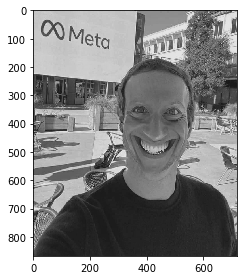

In [16]:
# To test your implementation, contrast strech the degraded image I_degrade
r1 = 0.3
r2 = 0.6
s1 = 0.1
s2 = 0.9
I_stretched = piecewise_contrast_stretch2(I_degraded, r1, r2, s1, s2)

# Display the strtched image
io.imshow(I_stretched)
### BEGIN SOLUTION
#o.imshow(I_stretched)
plt.show()

### END SOLUTION

# Task 2 - Histogram and Equalization

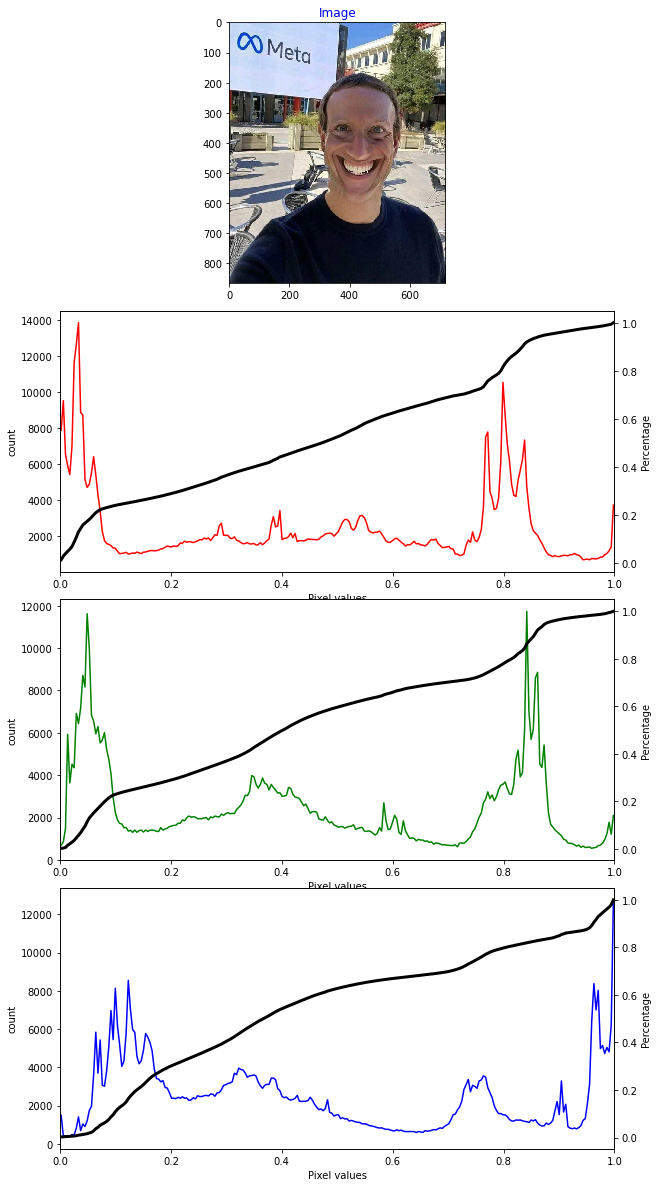

In [17]:
# Plot the Image and its histogram + cdf of the original image I
# Note that it is a color image, so it will have three different histograms

### BEGIN SOLUTION
def plot_img_histo_cdf(img, nbins = 256, normalize = False):            #THIS WILL WORK BOTH FOR COLOR AND GRAYSCALE
    if len(img.shape) == 2:
        plt.rcParams['figure.figsize'] = (8,8)
        plt.subplot(2,1,1)
        io.imshow(img)
        plt.axis = "off"
        plt.title("Image",color = "blue")
        plt.subplot(2,1,2)
        hist, bins_hist = exposure.histogram(img.ravel(),nbins = nbins, normalize = normalize)
        plt.plot(bins_hist,hist,color = "black")
        plt.xlabel("Pixel values")
        if normalize:
            plt.ylabel("probability")
        else:
            plt.ylabel("count")
        xmax = 1 if img.max() <= 1 else 255
        plt.xlim([0,xmax])
    
        cdf, bins_cdf = exposure.cumulative_distribution(img.ravel(),nbins = 256)
        plt.twinx()
        plt.plot(bins_cdf, cdf,'r', lw = 3)
        plt.ylabel("Percentage")
    elif len(img.shape) == 3:
        plt.rcParams['figure.figsize'] = (8,16)
        color = ["red","green","blue","black","aqua","gray"]
        plt.subplot(4,1,1)
        io.imshow(img)
        plt.axis = "off"
        plt.title("Image",color = "blue")
        z = 1
        for i in range(img.shape[2]):
            z += 1
            plt.subplot(4,1,z)
            hist, bins_hist = exposure.histogram(img[:,:,i].ravel(),nbins = nbins, normalize = normalize)
            plt.plot(bins_hist,hist,color = color[i])
            plt.xlabel("Pixel values")
            if normalize:
                plt.ylabel("probability")
            else:
                plt.ylabel("count")
            xmax = 1 if img[:,:,i].max() <= 1 else 255
            plt.xlim([0,xmax])
            if normalize:
                plt.ylabel("probability")
            else:
                plt.ylabel("count")
            xmax = 1 if img[:,:,i].max() <= 1 else 255
            plt.xlim([0,xmax])
            cdf, bins_cdf = exposure.cumulative_distribution(img[:,:,i].ravel(),nbins = 256)
            plt.twinx()
            plt.plot(bins_cdf, cdf,'black', lw = 3)
            plt.ylabel("Percentage")
            
        

plot_img_histo_cdf(I,normalize = False)
plt.show()

### END SOLUTION

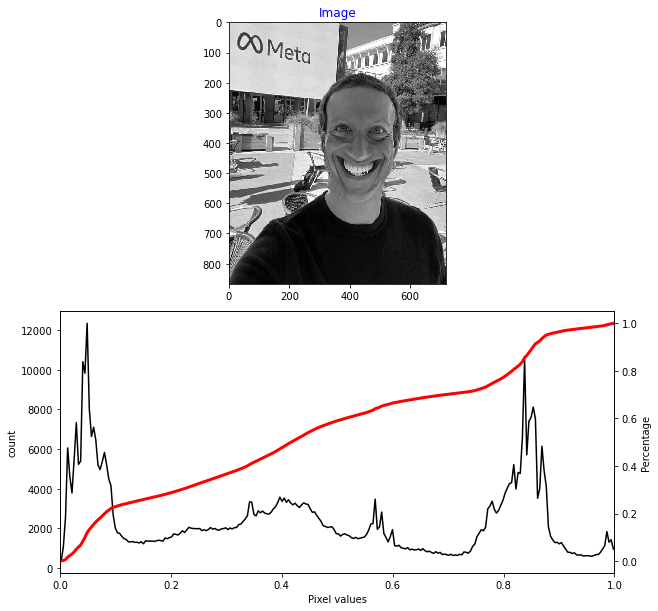

In [18]:
# Plot the Image and its histogram + cdf of the grayscale image I_gray

### BEGIN SOLUTION
plot_img_histo_cdf(I_gray)
### END SOLUTION

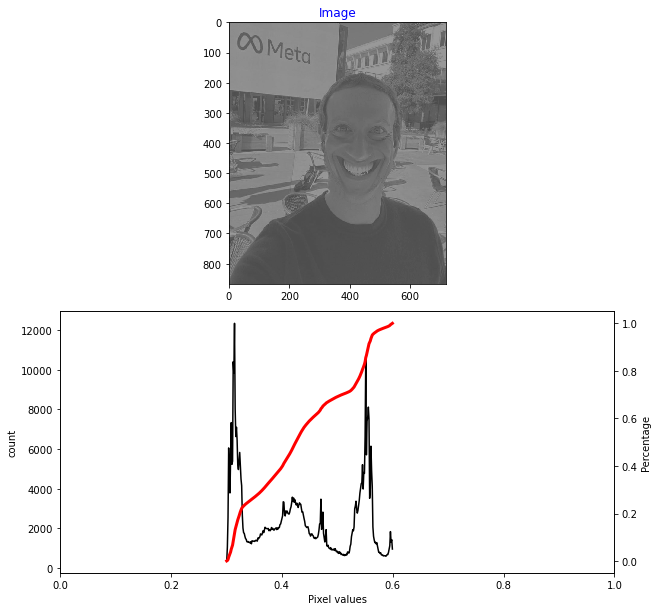

In [19]:
# Plot the Image and its histogram + cdf of the degraded image I_degraded

### BEGIN SOLUTION
plot_img_histo_cdf(I_degraded)
### END SOLUTION

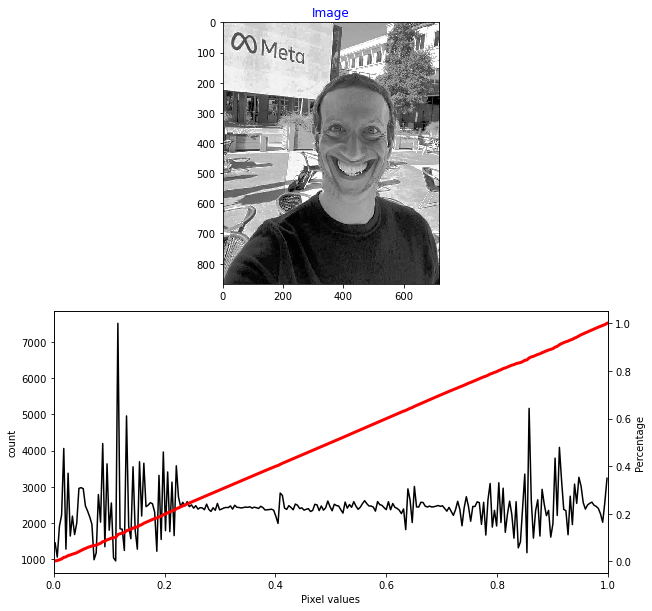

In [20]:
# Equalize the histogram of the degraded image I_degraded
# Save the result in I_recon_gray, display the image along with its histogram



### BEGIN SOLUTION
I_recon_gray = exposure.equalize_hist(I_degraded)
plot_img_histo_cdf(I_recon_gray)

### END SOLUTION

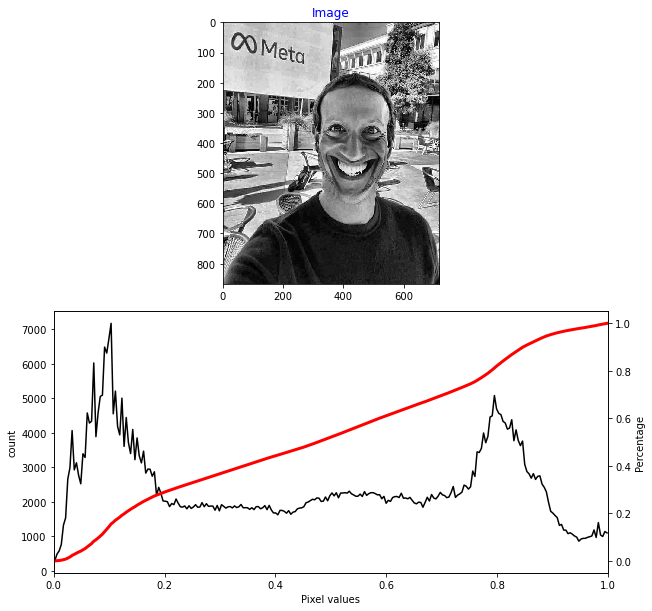

In [21]:
# Equalize the histogram of the degraded image I_degraded using AHE
# Save the result in I_recon_gray_2, display the image along with its histogram


### BEGIN SOLUTION
I_recon_gray_2 = exposure.equalize_adapthist(I_degraded,kernel_size=(100,100))
plot_img_histo_cdf(I_recon_gray_2)
### END SOLUTION

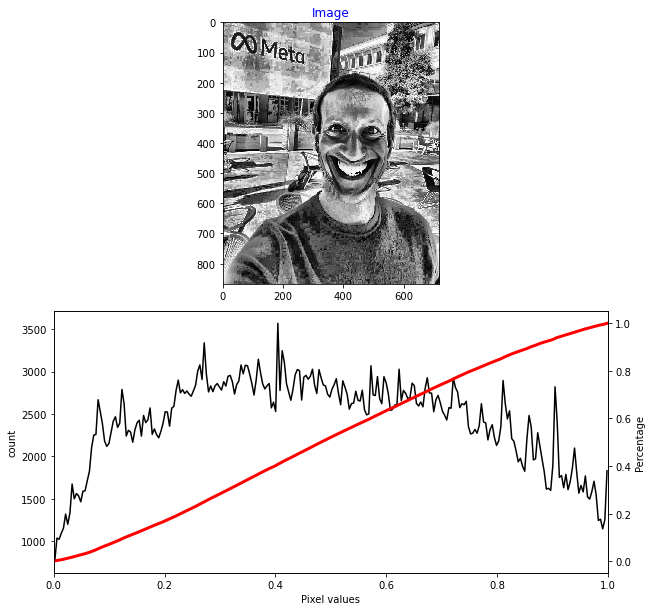

In [22]:
# Equalize the histogram of the degraded image I_degraded using CLAHE
# Save the result in I_recon_gray_2, display the image along with its histogram

I_recon_gray_3 = None

### BEGIN SOLUTION
I_recon_gray_3 = exposure.equalize_adapthist(I_degraded,kernel_size=(100,100),clip_limit=0.05)
plot_img_histo_cdf(I_recon_gray_3)

### END SOLUTION

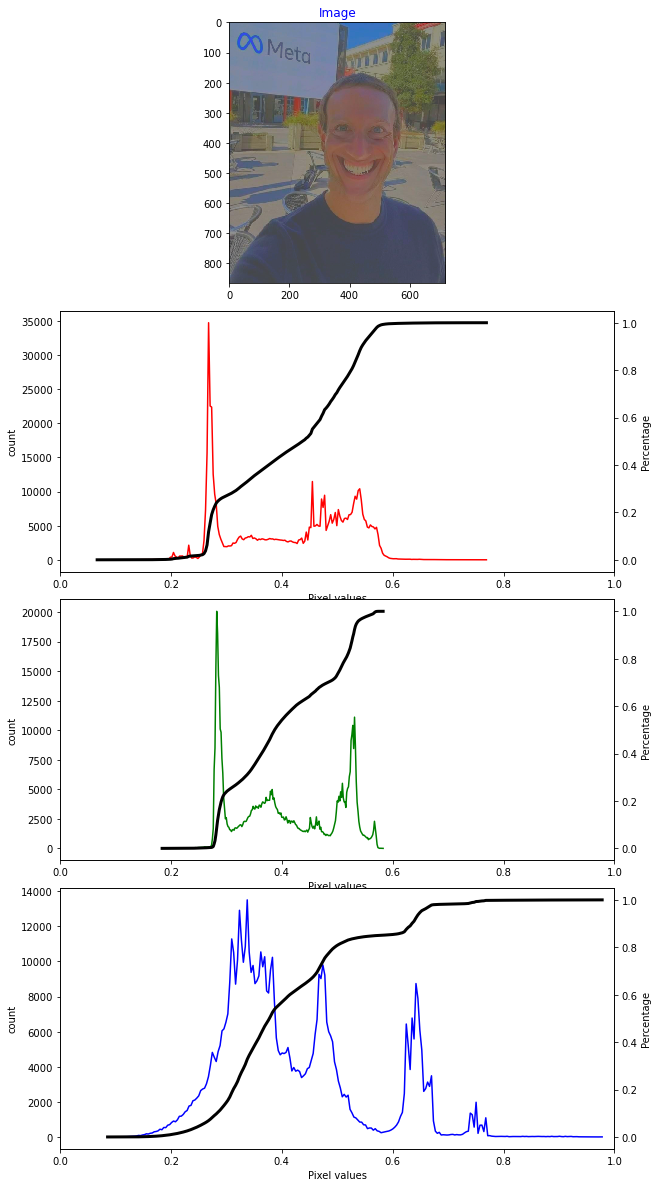

In [23]:
# Artificially degrade the original **RGB image** by reducing it contrast
# You can do so by recaling the values of the L channel (in LAB color space) 
# and concentrating them in a narrow range, say between 0.3 and 0.6.
# Save the image as I_rgb_degraded and display it
# HINT: SEE lec-4-demo-codes



### BEGIN SOLUTION
I_Lab = color.rgb2lab(I)
I_Lab[:,:,0] = I_Lab[:,:,0]/100
I_Lab_degraded = exposure.rescale_intensity(I_Lab[:,:,0],in_range=(0,1), out_range=(0.3,0.6))
I_Lab[:,:,0] = I_Lab_degraded*100
I_rgb_degraded = color.lab2rgb(I_Lab)
plot_img_histo_cdf(I_rgb_degraded)
### END SOLUTION

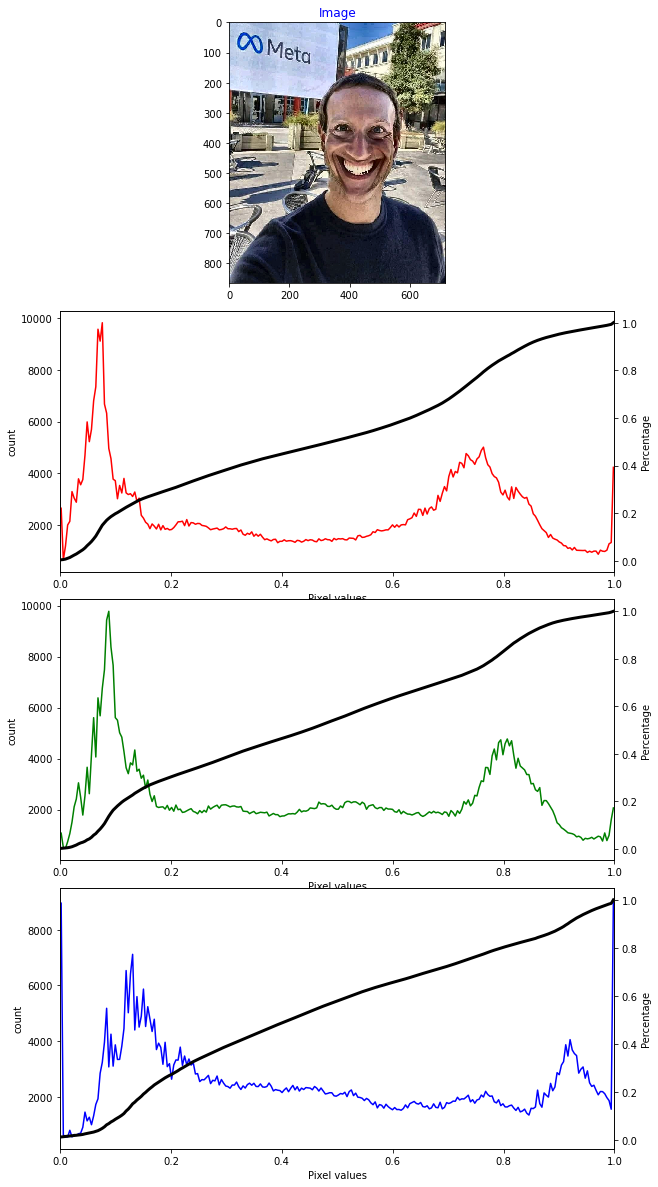

In [24]:
# Equalize the histogram of the degraded color image I_rgb_degraded using CLAHE
# Save the result in I_recon_color, display the image along with its histogram
# HINT: You have to convert to LAB first
# See the lecture and lecture-4-demo-codes



### BEGIN SOLUTION
I_lab2 = color.rgb2lab(I_rgb_degraded)
I_lab2[:,:,0] = I_lab2[:,:,0]/100
I_lab2[:,:,0] =  exposure.equalize_adapthist(I_lab2[:,:,0],kernel_size=(100,100),clip_limit=0.01)
I_lab2[:,:,0] = I_lab2[:,:,0]*100
I_recon_color = color.lab2rgb(I_lab2)
plot_img_histo_cdf(I_recon_color)
### END SOLUTION

# Task 3 - Open Ended

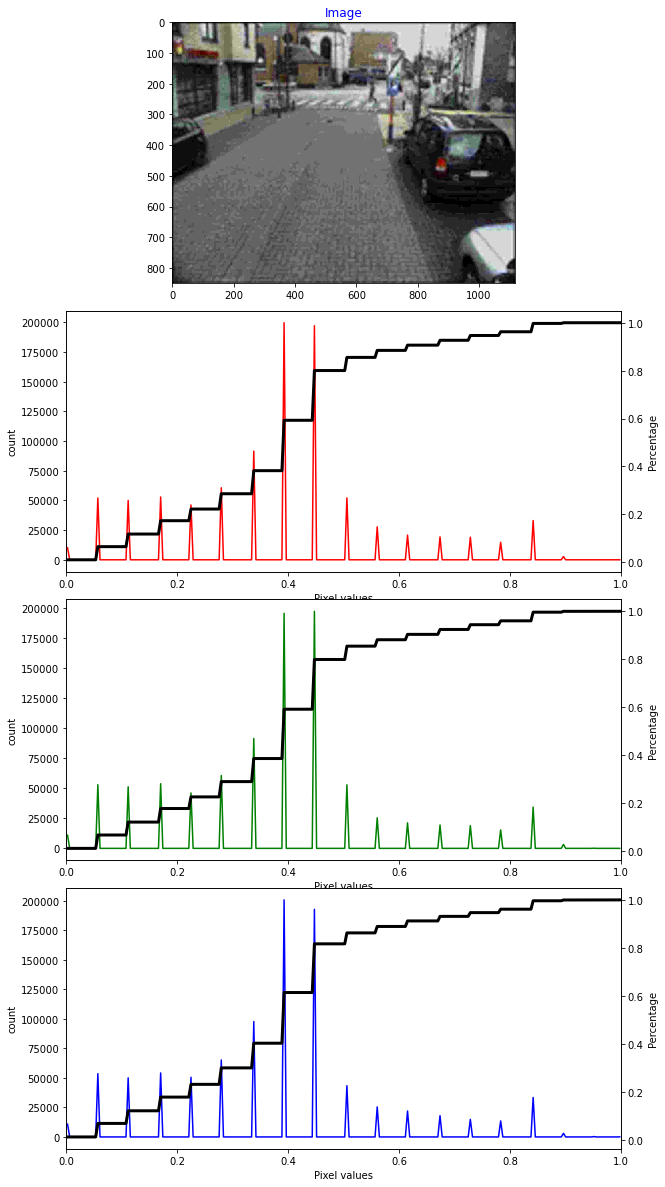

In [25]:
# There are four degraded images in this directory
# challenge-1.jpeg = very dark
# challenge-2.jpeg = washed out/foggy
# challenge-3.jpeg = alternative black bars
# challenge-4.jpeg = discoloured (the image is actually a color image) [BONUS]

# Your task is to improve these images using 
# contrast stretching, histogram equalization, AHE or CLAHE
# try different combination of parameter settings to see which produces the best result

### BEGIN SOLUTION
#CHALLANGE 1
c1 = io.imread("challenge-1.jpg")
c1 = c1/255

for i in range(3):
     c1[:,:,i] = exposure.rescale_intensity(c1[:,:,i],in_range=(0,0.070), out_range=(0,1))
plot_img_histo_cdf(c1)
### END SOLUTION

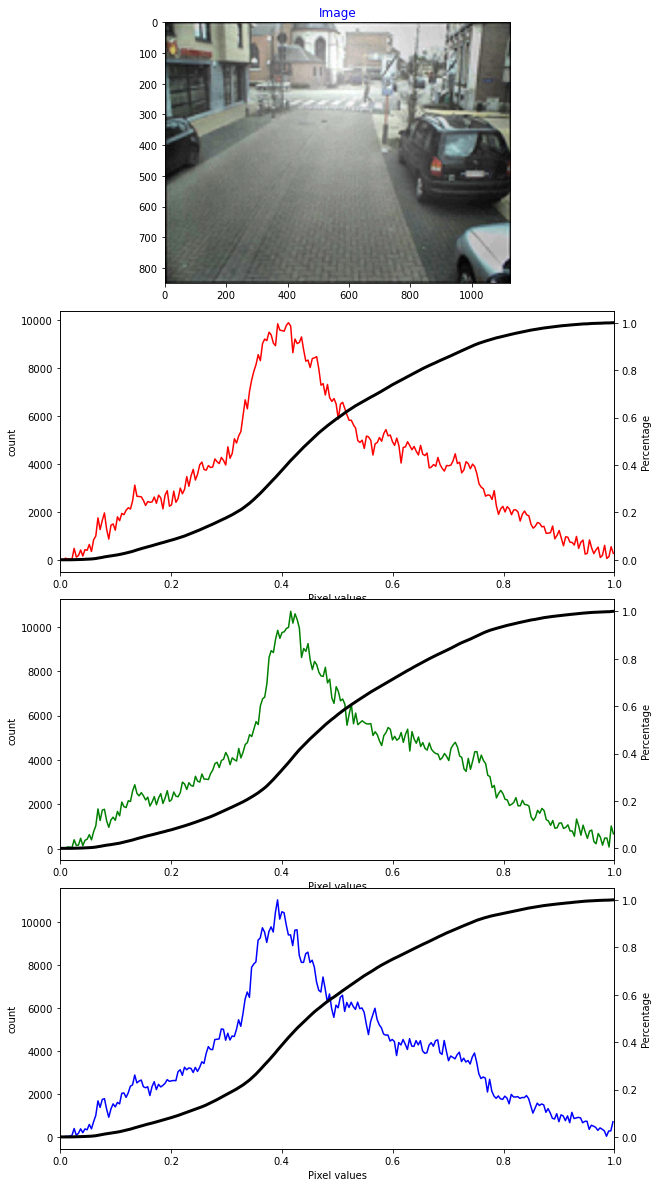

In [26]:
#CHALLANGE 2
c2 = io.imread("challenge-2.jpg")
c2 = c2/255

for i in range(3):
    c2[:,:,i] = exposure.rescale_intensity(c2[:,:,i],in_range=(0.4,0.85), out_range=(0,1))

c2 = exposure.equalize_adapthist(c2, kernel_size= (100,100), clip_limit= 0.01)
plot_img_histo_cdf(c2)

(850, 1116, 3) (850, 1116, 3) (850, 1116, 3)
(850, 1116, 3) (850, 1116, 3) (850, 1116, 3)


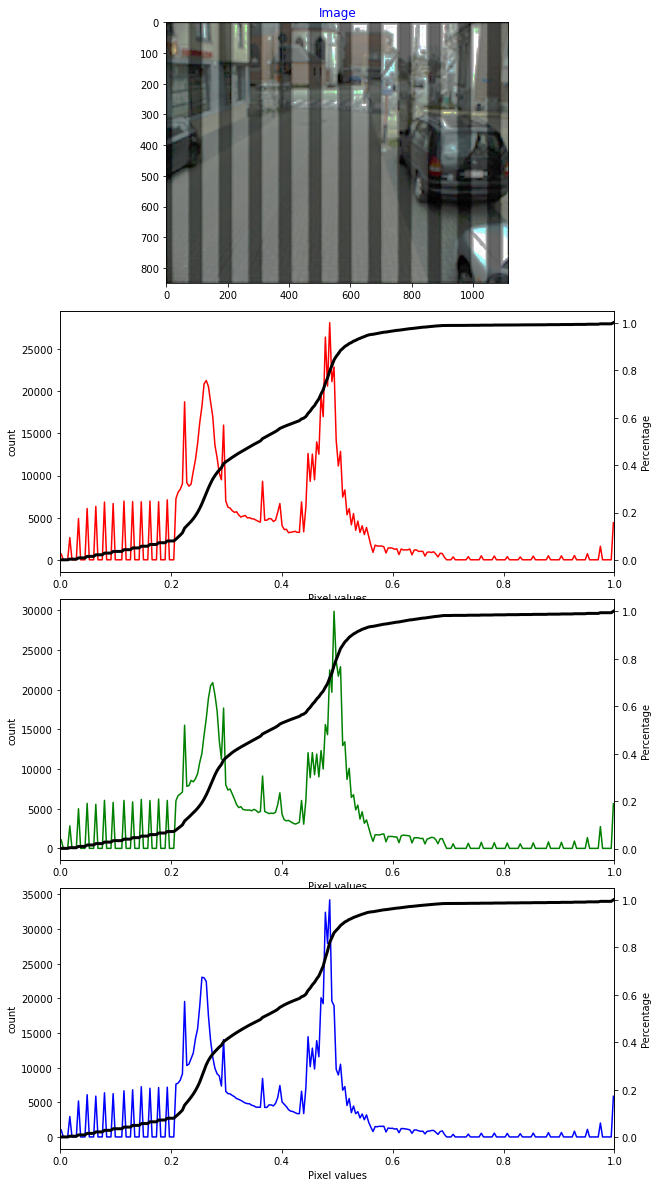

In [27]:
#CHALLANGE 3
c3 = io.imread("challenge-3.jpg")
c3 = c3/255
c31 = piecewise_contrast_stretch(c3,0.05,0.3,0.4,0.8)
c32 = piecewise_contrast_stretch(c3,0.7, 0.95,0.2,0.4)
c33 = np.divide(np.add(c31,c32),2)
plot_img_histo_cdf(c33)

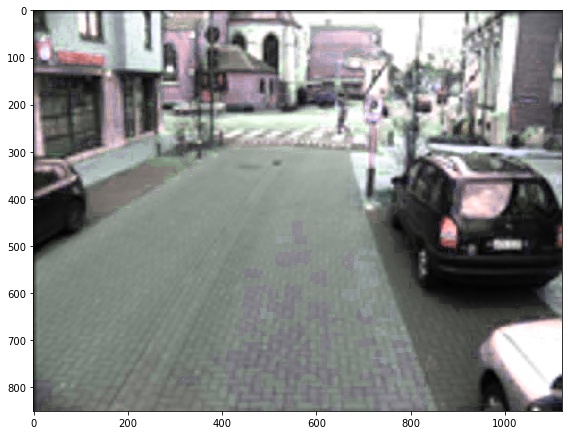

In [28]:
#CHALLANGE 4

c4 = io.imread("challenge-4.jpg")
c4 = c4/255
m = 8
r,g,b = c4[:,:,0],c4[:,:,1],c4[:,:,2]

r1 = np.where(r > g, np.clip(r+((r-g)*m),0,1), np.clip(r-((r-g)*m),0,1) )
r2 = np.where(r > b, np.clip(r+((r-b)*m),0,1), np.clip(r-((r-b)*m),0,1) )
g1 = np.where(g > r, np.clip(g+((g-r)*m),0,1), np.clip(g-((g-r)*m),0,1) )
g2 = np.where(g > b, np.clip(g+((g-b)*m),0,1), np.clip(g-((g-b)*m),0,1) )
b1 = np.where(b > r, np.clip(b+((b-r)*m),0,1), np.clip(b-((b-r)*m),0,1) )
b2 = np.where(b > g, np.clip(b+((b-g)*m),0,1), np.clip(b-((b-g)*m),0,1) )

r = np.divide( np.add(r1,r2),2)
g = np.divide( np.add(g1,g2),2)
b = np.divide( np.add(b1,b2),2)


c4[:,:,0],c4[:,:,1],c4[:,:,2] = r,g,b
io.imshow(c4)
plt.show()

In [29]:
# Tried different approaches which eventually didnt turn out well xD
# c4 = io.imread("challenge-4.jpg")
# m = 8
# r,g,b = c4[:,:,0],c4[:,:,1],c4[:,:,2]
# con1 = [(r > g) & (r > b)]
# con2 = [((r > g) & (r < b)) | ((r < g) & (r > b))]
# con3 = [(g > r) & (g > b)]
# con4 = [((g > r) & (g < b)) | ((g < r) & (g > b))]
# con5 = [(b > r) & (b > g)]
# con6 = [((b > r) & (b < g)) | ((b < r) & (b > g))]

# r1 = np.where(con1, np.clip(r+m,0,255), r)
# r2 = np.where(con2, np.clip(r+m//2,0,255), r)
# g1 = np.where(con3, np.clip(g+m,0,255), g)
# g2 = np.where(con4, np.clip(g+m//2,0,255), g)
# b1 = np.where(con5, np.clip(b+m,0,255), b)
# b2 = np.where(con6, np.clip(b+m//2,0,255), b)

# r = np.clip(np.divide( np.add(r1,r2),2),0,255)
# g = np.clip(np.divide( np.add(g1,g2),2),0,255)
# b = np.clip(np.divide( np.add(b1,b2),2),0,255)
# c4[:,:,0],c4[:,:,1],c4[:,:,2] = r,g,b
# io.imshow(c4)
# plt.show()

In [30]:


T1 = io.imread("T1.jpg")
T2 = io.imread("T2.jpg")
T3 = io.imread("T3.jpg")

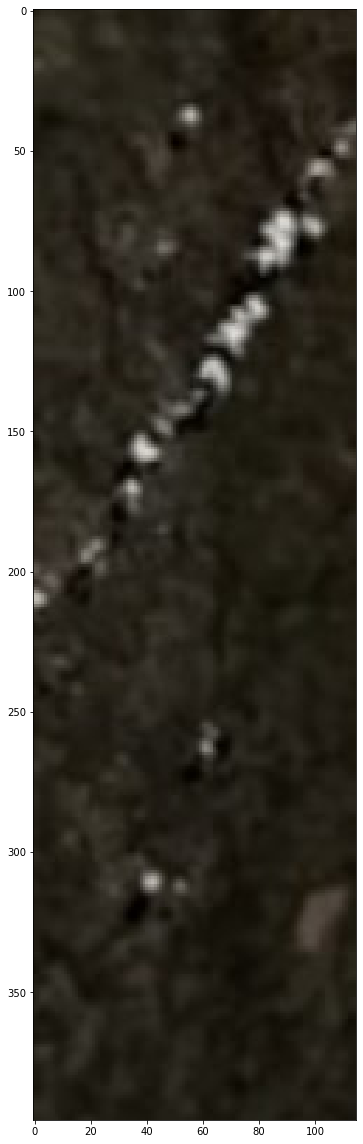

In [31]:
io.imshow(T1)

In [32]:

def hist_eq_col(I):
    I_lab = color.rgb2lab(I)
    I_lab[:,:,0]/=100
    I_lab_temp = exposure.equalize_hist(I_lab[:,:,0])
    I_lab[:,:,0] = I_lab_temp*100
    I = color.lab2rgb(I_lab)
    return I

def AHE(I, kernel_size):
    I_lab = color.rgb2lab(I)
    I_lab[:,:,0]/=100
    I_lab_temp = exposure.equalize_adapthist(I_lab[:,:,0], kernel_size=kernel_size, clip_limit=0)
    I_lab[:,:,0] = I_lab_temp*100
    I = color.lab2rgb(I_lab)
    return I

def CLAHE(I, kernel_size, clip_limit = 0.01):
    I_lab = color.rgb2lab(I)
    I_lab[:,:,0]/=100
    I_lab_temp = exposure.equalize_adapthist(I_lab[:,:,0], kernel_size=kernel_size, clip_limit=clip_limit)
    I_lab[:,:,0] = I_lab_temp*100
    I = color.lab2rgb(I_lab)
    return I

def piecewise_contrast_stretch_color(I, r1=.2, r2=.7, s1=.1, s2=.9):
    I_lab = color.rgb2lab(I)
    I_lab[:,:,0]/=100
    I_lab_temp = piecewise_contrast_stretch(I_lab[:,:,0], r1, r2, s1, s2)
    I_lab[:,:,0] = I_lab_temp*100
    I = color.lab2rgb(I_lab)
    return I

def print_all(I):
    io.imshow(I)
    #plt.axis("off")
    plt.title("Given Image")
    plt.show()
    I_eq = hist_eq_col(I)
    io.imshow(I_eq)
    #plt.axis("off")
    plt.title('Histogram Equalization')
    plt.show()
    I_AHE = AHE(I, (I.shape[0]//3,I.shape[1]//3))
    io.imshow(I_AHE)
    #plt.axis("off")
    plt.title('Adaptive Histogram Equalization')
    plt.show()
    I_CLAHE = CLAHE(I, (I.shape[0]//3,I.shape[0]//3))
    io.imshow(I_CLAHE)
    #plt.axis("off")
    plt.title('CLAHE')
    plt.show()
    return I_CLAHE
#     I_piec = piecewise_contrast_stretch_color(I)
#     io.imshow(I_piec)
#     plt.axis("off")
#     plt.title('Piecewise Contrast Stretch')
#     plt.show()
    
def print_col_img_hist_cdf(I):
    colors = ['Red', 'Blue', 'Green']
    io.imshow(I)
    #plt.axis('off')
    plt.title('Color Image')
    plt.show()
    for i in range(len(colors)):
        plt.subplot(3,1,i+1)
        hist, bins_hist = exposure.histogram(I[:,:,i].ravel(), nbins = 256, normalize=True)
        cdf, bins_cdf = exposure.cumulative_distribution(I[:,:,i].ravel(), nbins=256)
        plt.plot(bins_hist, hist, color = colors[i])
        plt.xlabel('Pixel Values '+ '(' + colors[i] + ')')
        plt.ylabel('Probability')
        plt.xlim([0, 1])
        plt.twinx()
        plt.plot(bins_cdf, cdf, color='black', lw = 3)
        plt.ylabel("Percentange")
        plt.show()


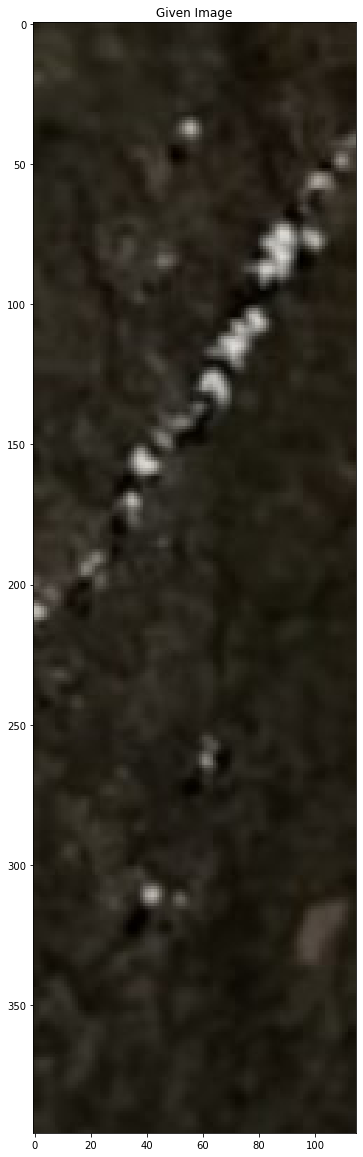

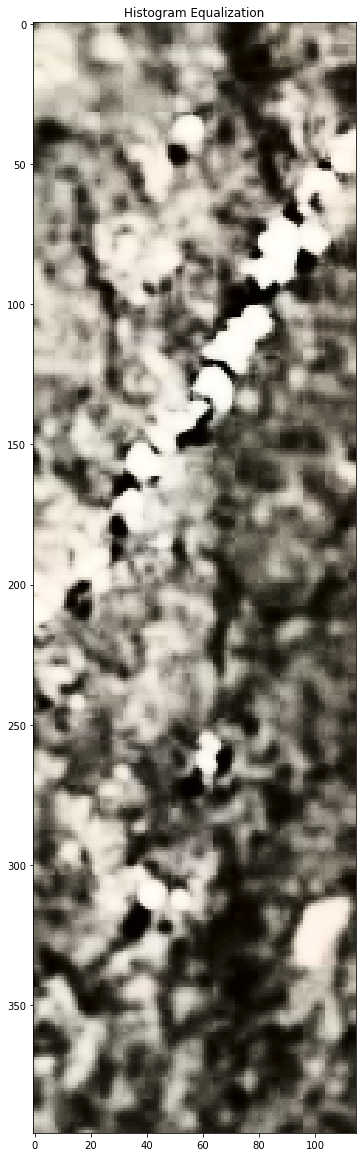

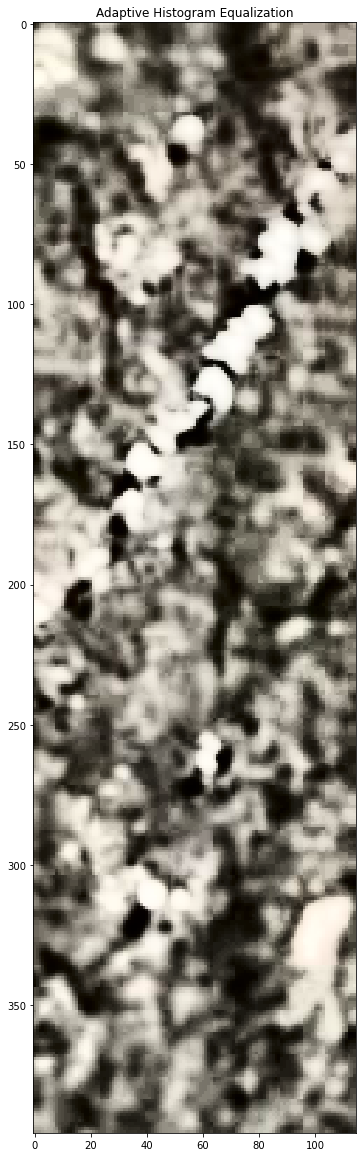

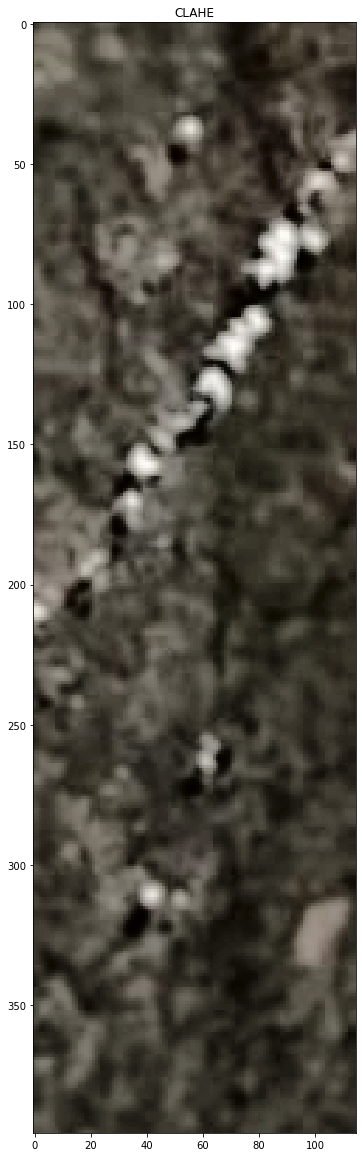

In [33]:
T4 = print_all(T1)


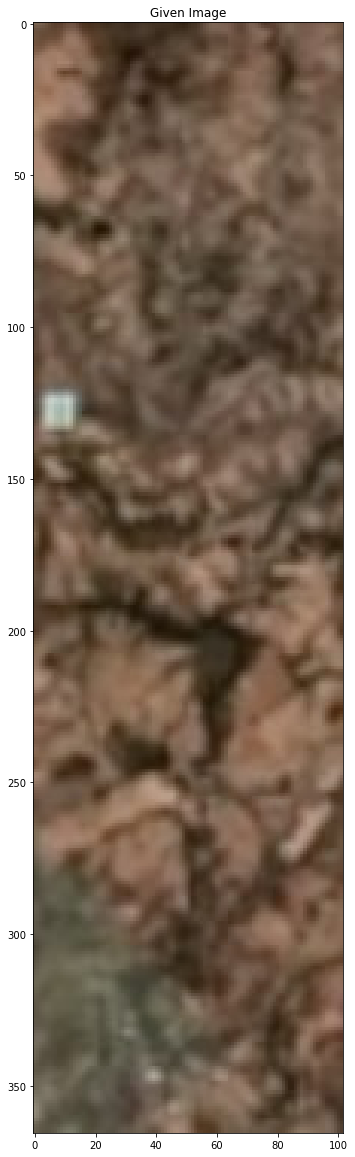

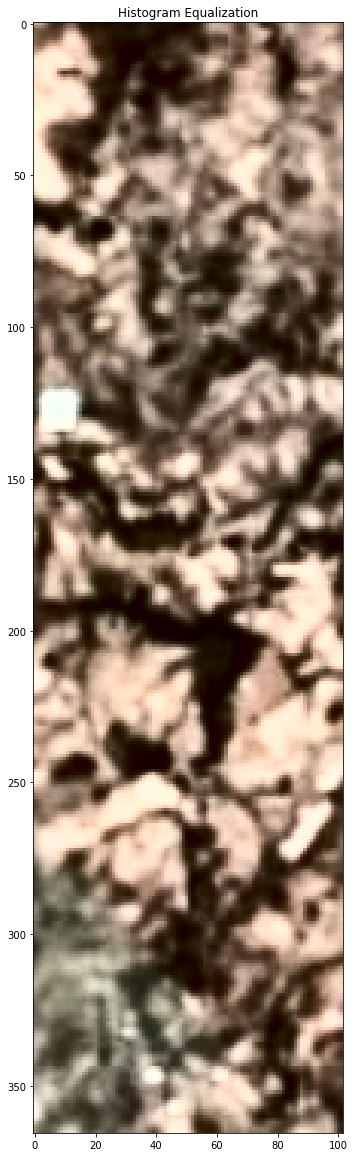

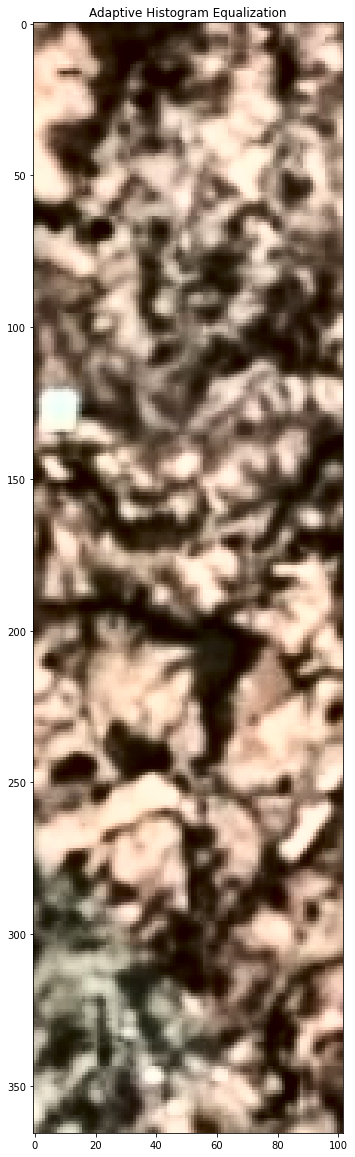

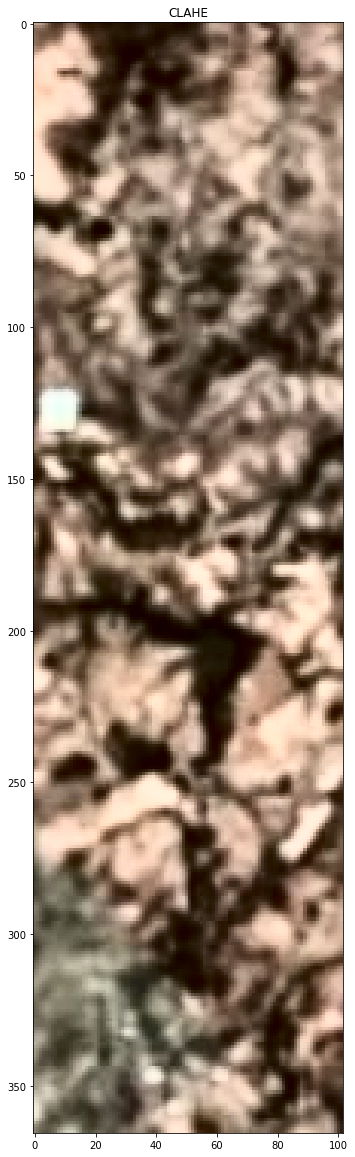

In [34]:
T5 = print_all(T2)


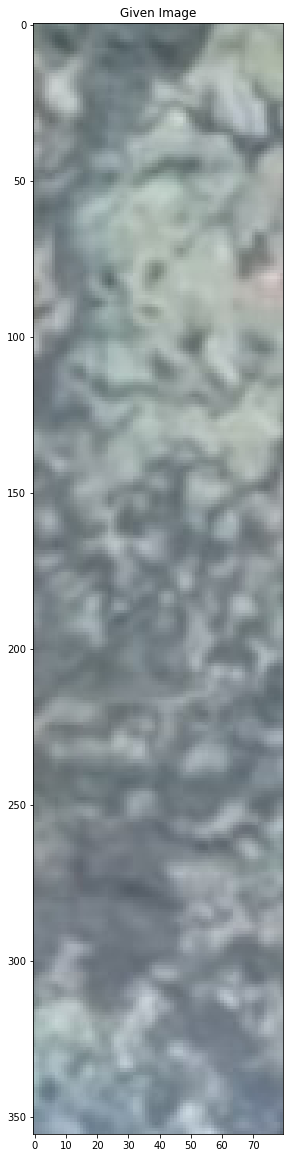

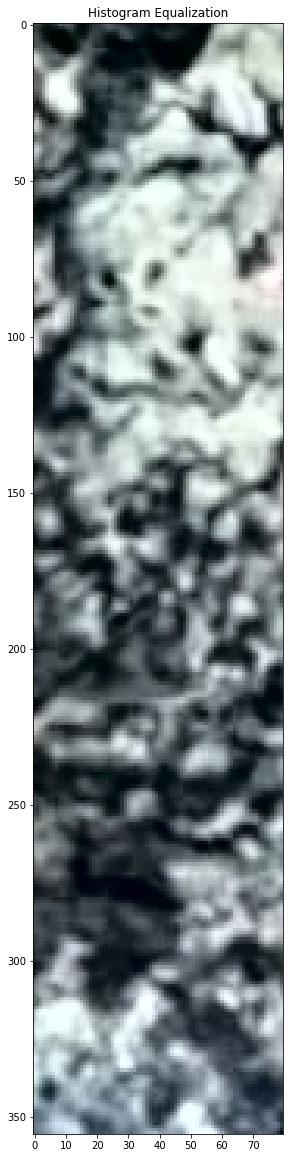

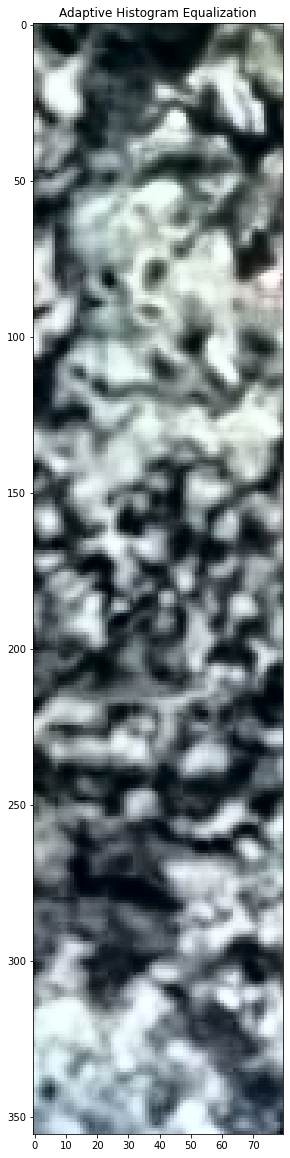

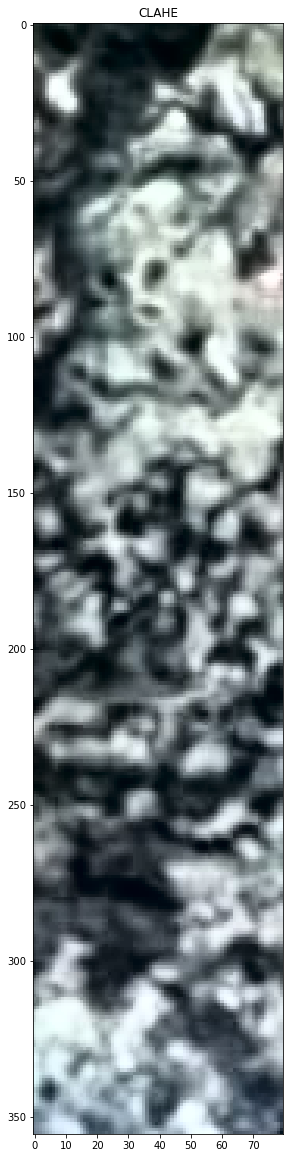

In [35]:
T6 = print_all(T3)


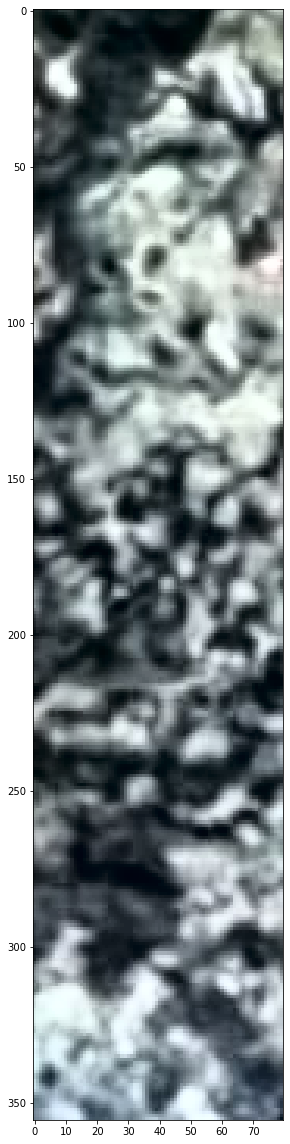

In [36]:
io.imshow(T6)

C:\Users\Niloy\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


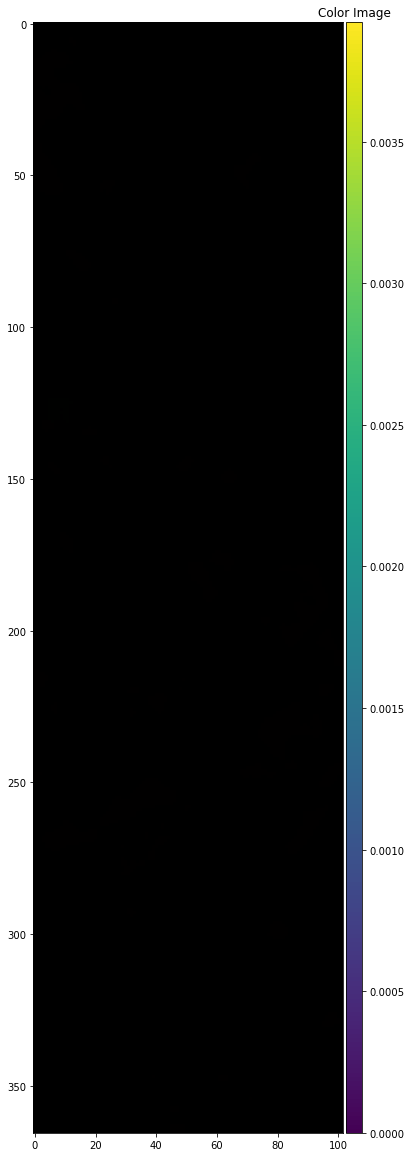

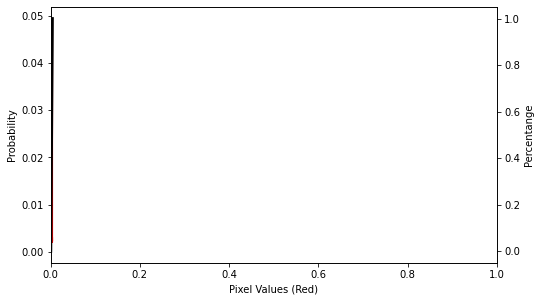

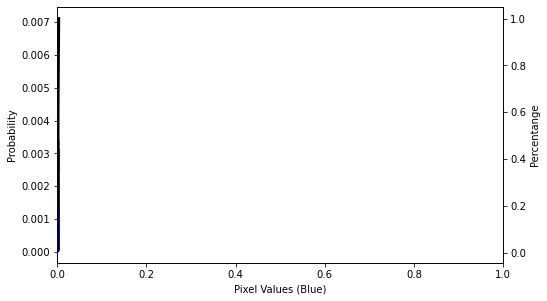

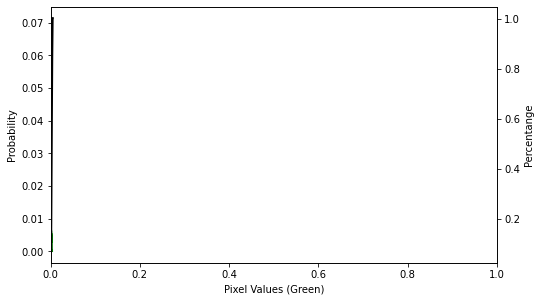

In [37]:
print_col_img_hist_cdf(T5/255)